# TSF Data Science & Business Analytics Task - 1

## Prediction using Supervised ML(By Danish Hasan) 

## To predict score if a student studies 9.5 hrs/day using "Linear Regression".

### Lets import required libraries to read, prepare and clean the data.

In [67]:
import pandas as pd

In [68]:
data = pd.read_csv('http://bit.ly/w-data')

In [69]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [70]:
data.shape

(25, 2)

In [71]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [72]:
data.head(8)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [74]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [75]:
#Checking for null data
data.isnull().sum().sum()
#since there is no null data, we do have to clean it.

0

# Exploratory Data Analysis

###  Visualizing our dataframe through various plots,graphs by using the matplotlib and seaborn libraries as done below to understand the trend and correlation between them.

In [76]:
#importing libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

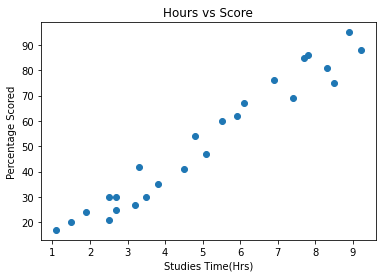

In [77]:
#plt.plot( x = data['Hours'], y = data['Scores']) This wont work we will have to use .scatter
#plt.plot(data['Hours'], data['Scores'], marker='o'). This can also be used
#data.plot(x = 'Hours', y = 'Scores', style='o'). This can also be used
plt.scatter( x = data['Hours'], y = data['Scores'])
plt.title('Hours vs Score')
plt.xlabel('Studies Time(Hrs)')
plt.ylabel('Percentage Scored')
plt.show()

### From the graph above, we can see that there is a positive linear relation between the number of hours studied and percentage of score.
### Let's verify that again below

In [78]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


The Correlation Matrix


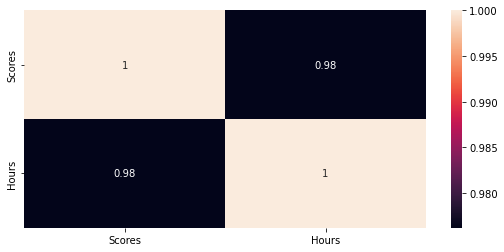

In [81]:
#plt.figure(figsize = (9,4))
sns.heatmap(data[['Scores','Hours']].corr(), annot = True)
print('The Correlation Matrix')
#plt.show()

In [127]:
#sns.lmplot(x="Hours",y="Scores", data=data)
#plt.title("Regression line")

# Preparing the data

### We need to split the data into "Attributes" (Input) & "Labels" (Output) to use an algo for trainig and testing purpose.

In [82]:
x = data.iloc[:, :-1].values

In [89]:
y = data.iloc[:, 1].values

In [90]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [91]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [99]:
#e, f=data['Hours'].to_numpy().reshape(-1,1),data['Scores'].to_numpy().reshape(1,-1)

In [103]:
#importing required libraries for linear regression from scikit learn.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [104]:
#splitting the data into train and test sets.
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.8, test_size = 0.2, random_state = 0) 

In [115]:
#Training the algorithm
linreg = LinearRegression()
linreg.fit(x_train, y_train)
print("Training is Complete")

Training is Complete


In [118]:
linreg.coef_,linreg.intercept_

(array([9.91065648]), 2.018160041434683)

# Plotting regression line


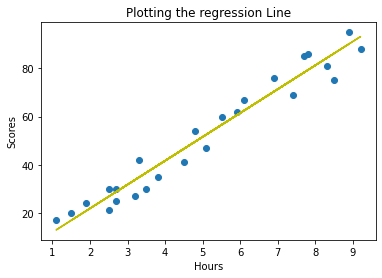

In [135]:
line = linreg.coef_*x+linreg.intercept_

#Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line,'y')
plt.title("Plotting the regression Line")
plt.ylabel('Scores')
plt.xlabel('Hours')
plt.show()

### From the above graph, we can see that there is a Positive Linear relationship between the number of hours studied and the scores obtained. We can say that for increase in Hours studied(x), there is an increase in the scores obatined(y)

# Making Predictions

In [147]:
print(x_test) #testing data in hours

y_pred = linreg.predict(x_test) #predicting the scores
print(y_pred.reshape(-1,1))

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


In [149]:
#comparing actual vs predicted data
df = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [151]:
# Estimating the Training Data and Test Data Score
print("Training score:", linreg.score(x_train, y_train))
print("Testing score:", linreg.score(x_test, y_test))


Training score: 0.9515510725211552
Testing score: 0.9454906892105356


## Visualizing test results 

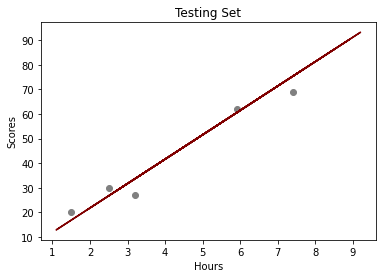

In [157]:
plt.scatter(x_test,y_test,color='grey')
plt.plot(x_train,linreg.predict(x_train),color='maroon')
plt.title('Testing Set')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## Visualizing train results

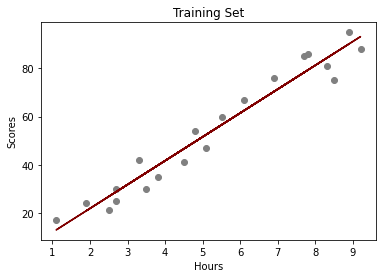

In [159]:
plt.scatter(x_train, y_train, color = 'grey')
plt.plot(x_train, linreg.predict(x_train), color = 'maroon')
plt.title('Training Set')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## Difference between actual and predicted value by graph

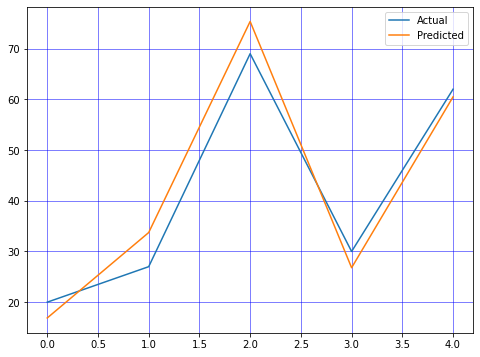

In [161]:
df.plot(kind='line', figsize=(8,6))
plt.grid(which='major', linewidth='0.5', color = 'black')
plt.grid(which='major', linewidth='0.5', color = 'blue')
plt.show()

In [190]:
#linreg.predict([[9.25]])


#print(linreg.predict([[9.25]]))


Hours = np.array([[9.25]])
own_pred = linreg.predict(Hours)
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


## Checking accuracy of the model

In [194]:
print("Train : ",linreg.score(x_train, y_train)*100)
print("Test : ",linreg.score(x_test, y_test)*100)

Train :  95.15510725211553
Test :  94.54906892105356


# Evaluating the model

In [196]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [208]:
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, (y_pred)))
print('r^2 score error:',r2_score(y_test, (y_pred)))
print('Mean squared error: ',mean_squared_error(y_test, (y_pred)))
print('Root mean squared Error:', np.sqrt(metrics.mean_squared_error(y_test, (y_pred))))

Mean Absolute Error : 4.183859899002975
r^2 score error: 0.9454906892105356
Mean squared error:  21.5987693072174
Root mean squared Error: 4.6474476121003665
